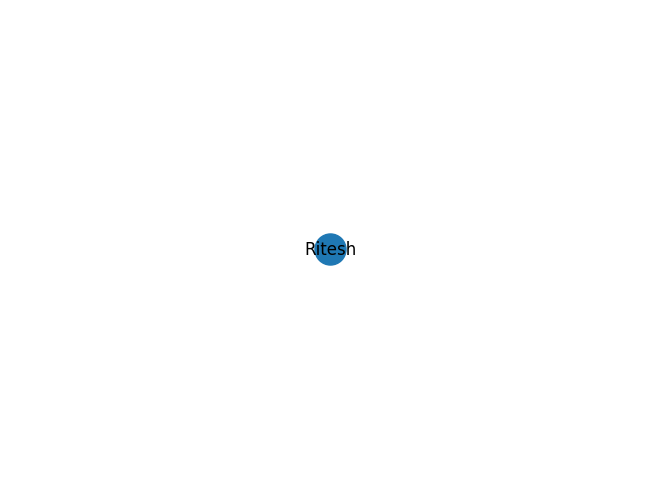

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import math
from itertools import permutations
df=pd.read_csv("\profile_dataNewest.csv")
G=nx.Graph()
label={}
likes={}

def create_nodes():
  i=-1
  for user in df['first_name']:
    label[user]=user
    G.add_node(user)
    i+=1
    likes[user]=df.categories[i]
  #graph=nx.draw(G, labels=label ,with_labels=True)

def calc_weight(n1,n2):
  a={}
  b={}
  a=likes[n1].split(',')
  b=likes[n2].split(',')
  inter=len(set(a).intersection(set(b)))
  uni=len(set(a).union(set(b)))
  c=float(inter/uni)
  return c*100

def main():
  create_nodes()
  comb_list=permutations(label,2)
  for i in comb_list:
    x=i[0]
    y=i[1]
    score=calc_weight(x,y)
    #print(a)
    if score>0:
      G.add_edge(x,y,weight=score)

main()
nx.draw(G, pos=nx.shell_layout(G), labels=label ,with_labels=True, node_size=500)
plt.draw()
data=(G.get_edge_data("Ritesh","Yash"))
#print(data)
temp=permutations(label,2)
for i in temp:
  if i[0]=="Ritesh":
    score=calc_weight(i[0],i[1])
    if score>0:
      print(i[0],':',i[1],', Score :',G.get_edge_data(i[0],i[1])["weight"])

